Regresión Logística EDA

In [ ]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (10,10)

# Warning
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Cargamos el dataframe
df = pd.read_csv("pima-indians-diabetes.csv", index_col=0)

Análisis Exploratorio

In [26]:
df.head()

,glucose,pressure,triceps,insulin,mass,pedigree,age,class
pregnant,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [27]:
# Reseteamos el index para que gender sea una columna de nuestro dataframe
df.reset_index(inplace=True)

In [28]:
df.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Vemos la dimensión de nuestro dataframe. Tiene un total de 1000 filas y 8 columnas.
df.shape

(768, 9)

In [30]:
# Vemos las columnas de nuestro dataframe.
df.columns

Index(['pregnant', 'glucose', 'pressure', 'triceps', 'insulin', 'mass',
       'pedigree', 'age', 'class'],
      dtype='object')

In [31]:
# # Vemos de manera más general el tipo de datos y nulos que tiene nuestro dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   pressure  768 non-null    int64  
 3   triceps   768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
# La variable class es un object en lugar de int, debemos modificarlo
df['class'] = df['class'].astype('object')

In [35]:
# Visualizamos los principales estadísticos de las columnas numéricas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [36]:
# Visualizamos los principales estadísticos de las columnas categóricas.
df.describe(include="object").T

,count,unique,top,freq
class,768,2,0,500


In [37]:
# Visualizamos los nulos de nuestro dataframe.
df.isnull().sum()

pregnant    0
glucose     0
pressure    0
triceps     0
insulin     0
mass        0
pedigree    0
age         0
class       0
dtype: int64

In [38]:
# Visualizmos los duplicados de nuestro dataframe.
df.duplicated().sum()

0

Detección de Outliers y tratamiento de los mismos

In [39]:
# Creamos un dataframe para las columnas numéricas.
numericas = df.select_dtypes(include=np.number)
numericas.head(2)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


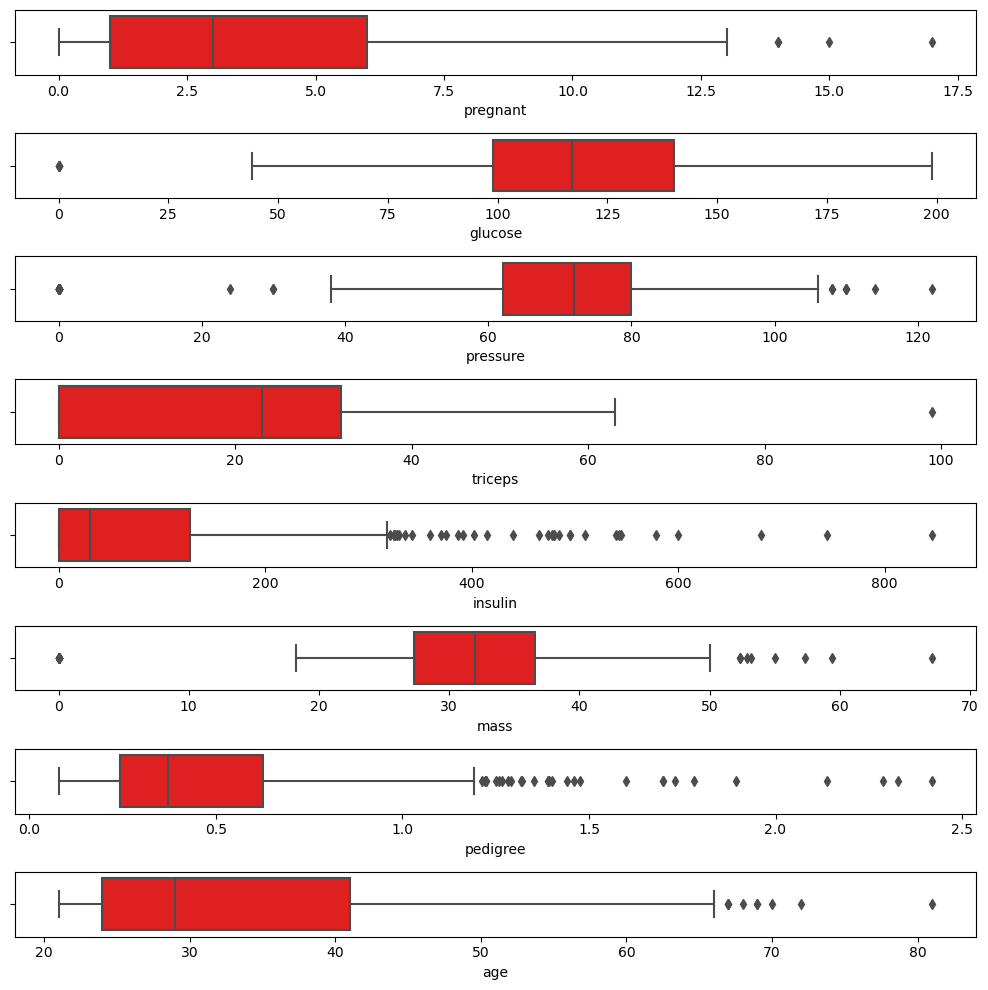

In [43]:
# Visualizamos nuestros outliers de las columnas numéricas a través de la visualización con boxplots.

fig, axes = plt.subplots(8, 1, figsize=(10,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "red"); # para trazar una línea de densidad

    
plt.tight_layout()

plt.show()